In [1]:
from julia.api import Julia
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
os.environ["JULIA_NUM_THREADS"] = "4"
jl = Julia(compiled_modules=False)


In [9]:
#print(jl.eval('Threads.nthreads()'))
jl.eval('include("time_statistics.jl")')

<PyCall.jlwrap time_e_var>

### **1. Time when varyng A dimentions** ###

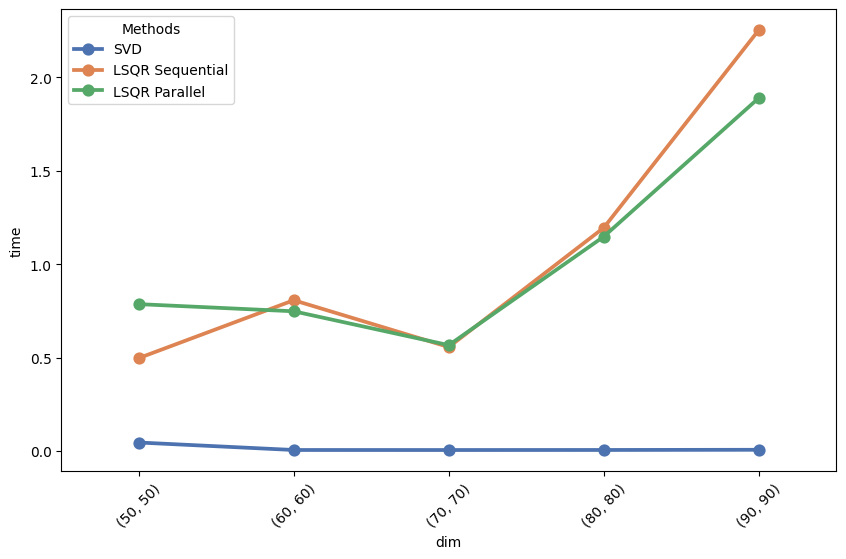

In [4]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_A_var()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'LSQR Sequential'
df3['Methods'] = 'LSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Convert 'dim' to string so it can be used as a categorical variable
df['dim'] = df['dim'].astype(str)

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='dim', y='time', hue='Methods', palette='deep')
plt.xticks(rotation=45)
plt.show()

### **2. Time when varyng k value** ###

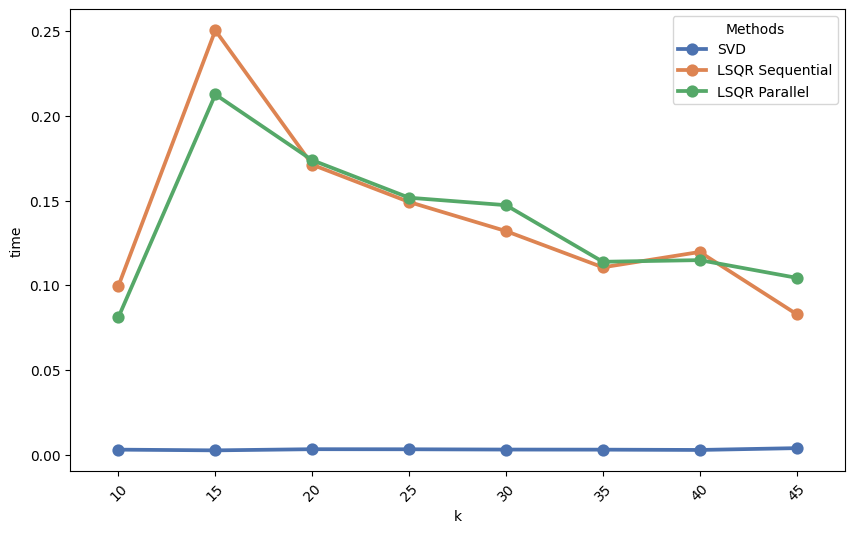

In [8]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_k_var()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'LSQR Sequential'
df3['Methods'] = 'LSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='k', y='time', hue='Methods', palette='deep')
plt.xticks(rotation=45)
plt.show()

### **3. Time when varyng the e value** ### 

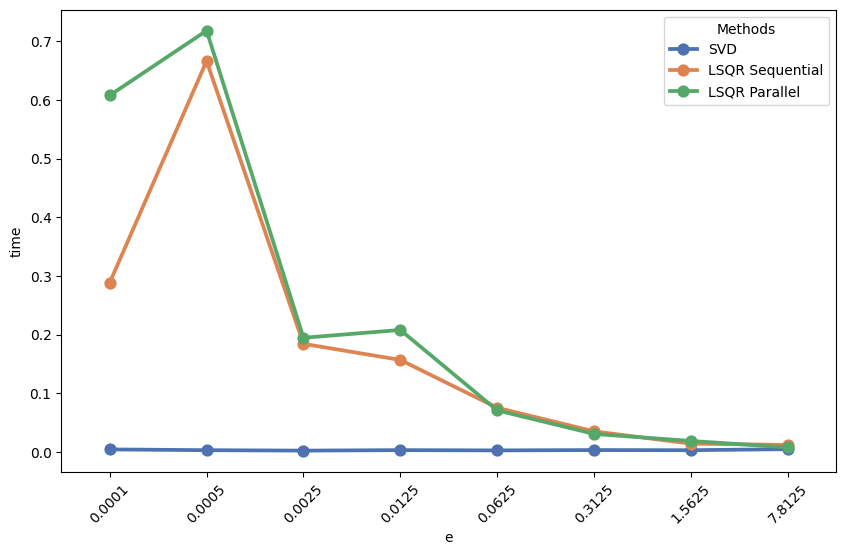

In [10]:
Svd_time, LSQR_seq, LSQR_par = jl.eval('time_e_var()')

# Convert to DataFrames
df1 = pd.DataFrame(Svd_time)
df2 = pd.DataFrame(LSQR_seq)
df3 = pd.DataFrame(LSQR_par)

# Add a 'method' column to distinguish the data sources
df1['Methods'] = 'SVD'
df2['Methods'] = 'LSQR Sequential'
df3['Methods'] = 'LSQR Parallel'

# Concatenate the dataframes
df = pd.concat([df1, df2, df3])

# Create the plot
plt.figure(figsize=(10, 6))
sns.pointplot(data=df, x='e', y='time', hue='Methods', palette='deep')
plt.xticks(rotation=45)
plt.show()